<AxesSubplot:title={'center':'2020-01-13 06:00 (500 m)'}>

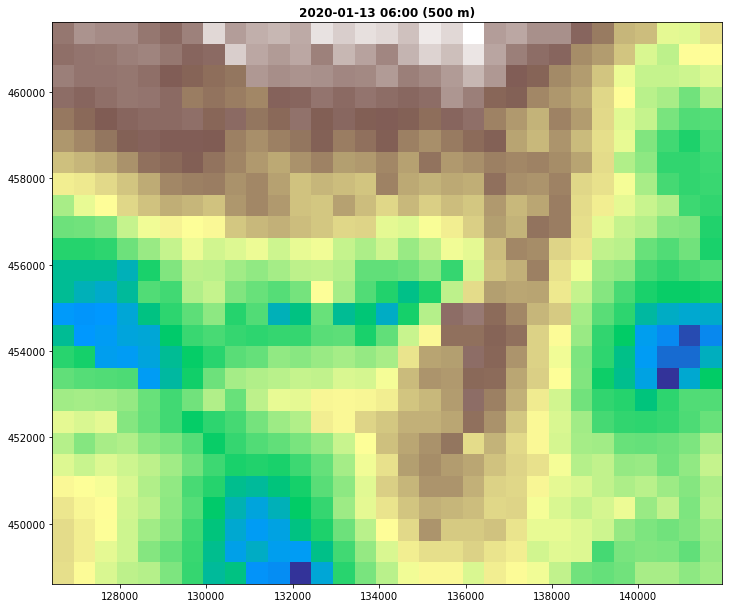

In [125]:
import rasterio
from matplotlib import pyplot
from rasterio.plot import show
import matplotlib.pyplot as plt
# Import packages
import pandas as pd 
import numpy as np 
import geopandas as gpd 
import matplotlib.pyplot as plt

from tqdm import tqdm

import plotly.express as px
from collections import Counter
import glob
import math
import re


src = rasterio.open("../output/st_reg_kriging_maps/prediction/500/20200113060000.tif")



f, ax = plt.subplots(1, figsize=(12, 15))

show(src, cmap="terrain", title="2020-01-13 06:00 (500 m)", ax=ax)

#pyplot.imshow(src.read(1), cmap='terrain')
#pyplot.show()



<AxesSubplot:title={'center':'125'}>

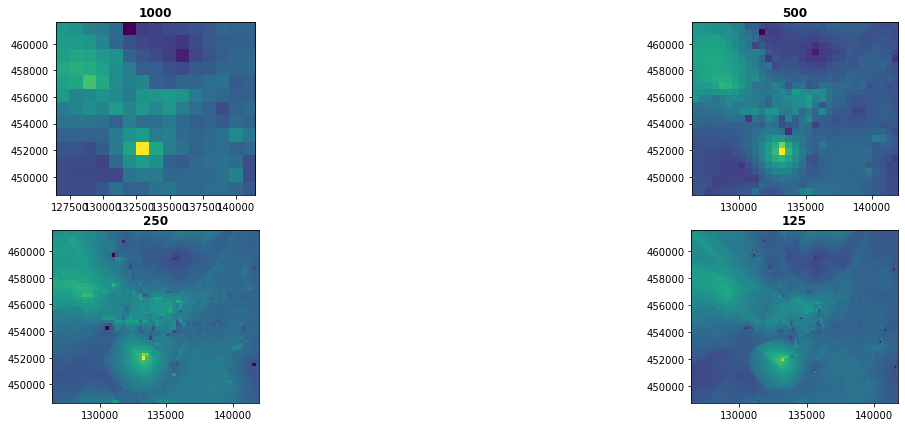

In [44]:
from rasterio.plot import show

src1 = rasterio.open("../output/st_reg_kriging_maps/prediction/1000/20200107060000.tif")
src2 = rasterio.open("../output/st_reg_kriging_maps/prediction/500/20200107060000.tif")
src3 = rasterio.open("../output/st_reg_kriging_maps/prediction/250/20200107060000.tif")
src4 = rasterio.open("../output/st_reg_kriging_maps/prediction/125/20200107060000.tif")
src5 = rasterio.open("../output/st_reg_kriging_maps/prediction/100/20200107060000.tif")



fig, ([ax1, ax2], [ax3, ax4]) = plt.subplots(2,2, figsize=(21, 7))
show(src1, ax=ax1, title='1000')
show(src2, ax=ax2, title='500')
show(src3, ax=ax3, title='250')
show(src4, ax=ax4, title='125')
#show(src5, ax=ax5, title='100')



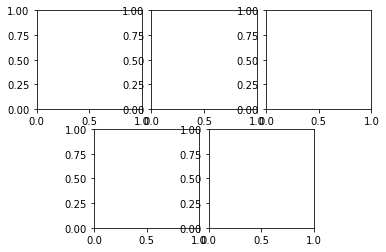

In [33]:
ax1 = plt.subplot2grid(shape=(2,6), loc=(0,0), colspan=2)
ax2 = plt.subplot2grid((2,6), (0,2), colspan=2)
ax3 = plt.subplot2grid((2,6), (0,4), colspan=2)
ax4 = plt.subplot2grid((2,6), (1,1), colspan=2)
ax5 = plt.subplot2grid((2,6), (1,3), colspan=2)
plt.show()

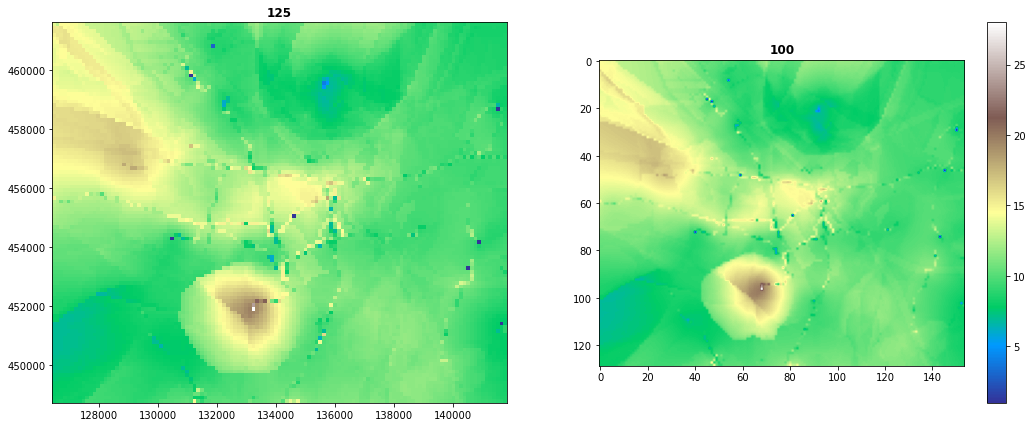

In [87]:
src1 = rasterio.open("../output/st_reg_kriging_maps/prediction/125/20200107060000.tif")
src2 = rasterio.open("../output/st_reg_kriging_maps/prediction/100/20200107060000.tif")

src2 = src2.read(1)


fig, (axdsm, axdtm) = plt.subplots(1, 2, figsize=(18, 7))
show(src1, ax=axdsm, title='125', cmap="terrain")
show(src2, ax=axdtm, title='100', cmap="terrain")


# use imshow so that we have something to map the colorbar to
image_hidden = ax.imshow(src2, 
                         cmap='terrain')

# add colorbar using the now hidden image
fig.colorbar(image_hidden, ax=axdtm)

plt.show()

In [84]:
src2.max()

28.0

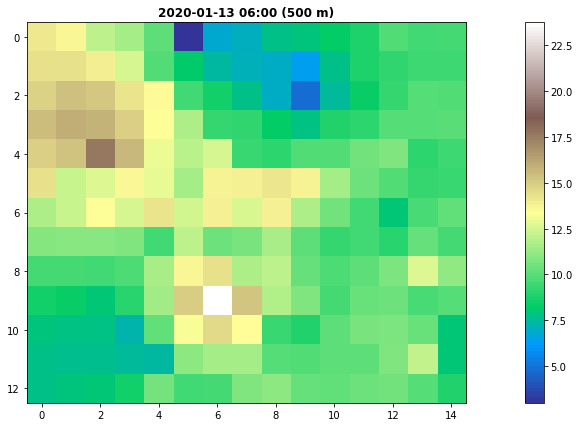

In [92]:
src = rasterio.open("../output/st_reg_kriging_maps/prediction/1000/20200107060000.tif")
src = src.read(1)

fig, ax = plt.subplots(figsize=(21, 7))

# use imshow so that we have something to map the colorbar to
image_hidden = ax.imshow(src, 
                         cmap='terrain')

# plot on the same axis with rio.plot.show
image = show(src, 
            #transform=src.transform, 
            ax=ax, 
            cmap='terrain',title="2020-01-13 06:00 (500 m)")

# add colorbar using the now hidden image
fig.colorbar(image_hidden, ax=ax)



In [73]:
fig.savefig("../test.png")

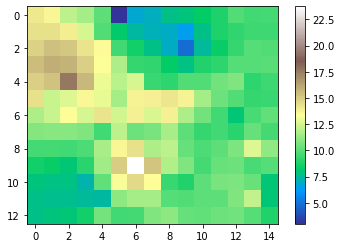

In [51]:
import rasterio
from matplotlib import pyplot
src = rasterio.open("../output/st_reg_kriging_maps/prediction/1000/20200107060000.tif")
pyplot.imshow(src.read(1), cmap='terrain')
pyplot.colorbar()
pyplot.show()

Text(0.5, 1.0, '$PM_{2.5} ({\\mu}g/m^{-3})$')

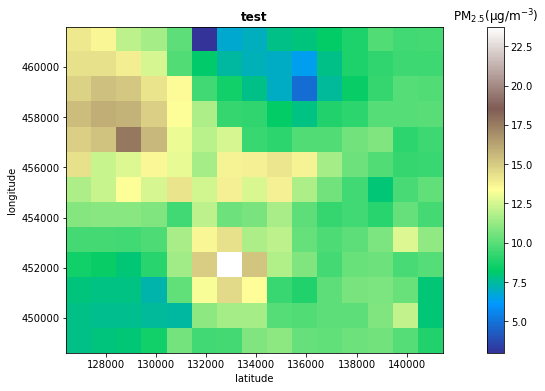

In [124]:
import rasterio
from matplotlib import pyplot
from matplotlib import colors, cm
from rasterio.plot import show
import numpy as np

src = rasterio.open("../output/st_reg_kriging_maps/prediction/1000/20200107060000.tif")
fig, ax = plt.subplots(figsize=(16, 6))
cmap = pyplot.get_cmap('terrain')
data = src.read()
show(data, transform=src.transform, ax=ax, cmap=cmap, title="test")
ax.set_ylabel('longitude')
ax.set_xlabel('latitude')
fig.colorbar(cm.ScalarMappable(norm=colors.Normalize(vmin=np.nanmin(data), vmax=np.nanmax(data)), cmap=cmap), ax=ax).ax.set_title('$PM_{2.5} ({\mu}g/m^{-3})$')



In [128]:
from datetime import datetime

date_time_str = '18/09/19 01:55:19'

date_time_obj = 
date_time_obj

datetime.datetime(2019, 9, 18, 1, 55, 19)

In [174]:
date = "20200106090000"



'06-01-2020 between 09:00 and 10:00'

In [178]:



path = "../output/st_reg_kriging_maps/prediction/100/" # use your path
all_files = glob.glob(path + "*.tif")


for filename in tqdm(all_files):
    src = rasterio.open(filename)
    raster = filename.split("\\")[1]
    
    date = raster.split(".")[0]
    date = date + "000000"
    month = date[4:6]
    day = date[6:8]
    hour = date[8:10]
    hour2 = int(hour)+1

    if hour2 < 10:
        hour2 = "0"+str(hour2)
    
    text = f"{day}-{month}-2020 between {hour}:00 and {hour2}:00"
    
    fig, ax = plt.subplots(figsize=(16, 6))
    cmap = pyplot.get_cmap('terrain')
    data = src.read()
    show(data, transform=src.transform, ax=ax, cmap=cmap, title=text)
    ax.set_ylabel('longitude')
    ax.set_xlabel('latitude')
    fig.colorbar(cm.ScalarMappable(norm=colors.Normalize(vmin=np.nanmin(data), vmax=np.nanmax(data)), cmap=cmap), ax=ax).ax.set_title('$PM_{2.5} ({\mu}g/m^{-3})$')
    fn = "C:/Users/Klant/Downloads/test/100/" + raster
    fig.savefig(fn)
    plt.close()
    
    
# TO DO: At 100m, timeslots 15-01 13:00 tm 17:00 look interesting. Fix the colorbar to the same range, and show plot in Paper.


100%|██████████████████████████████████████████████████████████████████████████████████| 54/54 [00:12<00:00,  4.41it/s]


In [135]:
all_files

['../output/st_reg_kriging_maps/prediction/1000\\20200106060000.tif',
 '../output/st_reg_kriging_maps/prediction/1000\\20200106070000.tif',
 '../output/st_reg_kriging_maps/prediction/1000\\20200106080000.tif',
 '../output/st_reg_kriging_maps/prediction/1000\\20200106090000.tif',
 '../output/st_reg_kriging_maps/prediction/1000\\20200106100000.tif',
 '../output/st_reg_kriging_maps/prediction/1000\\20200106110000.tif',
 '../output/st_reg_kriging_maps/prediction/1000\\20200106120000.tif',
 '../output/st_reg_kriging_maps/prediction/1000\\20200106130000.tif',
 '../output/st_reg_kriging_maps/prediction/1000\\20200106140000.tif',
 '../output/st_reg_kriging_maps/prediction/1000\\20200106150000.tif',
 '../output/st_reg_kriging_maps/prediction/1000\\20200106160000.tif',
 '../output/st_reg_kriging_maps/prediction/1000\\20200106170000.tif',
 '../output/st_reg_kriging_maps/prediction/1000\\20200106180000.tif',
 '../output/st_reg_kriging_maps/prediction/1000\\20200106190000.tif',
 '../output/st_reg_k